# HW 8

The first three cells below compose an example of human face recognition program on lfw dataset with PCA methos as an important ingredient.

In this assignment, you are asked to read and understand the code, look into what role PCA plays in it, implement your own PCA and a face recognition program using your PCA implementation, and test how it performs agains this implementation via skearn.


In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA as sklearn_PCA
from sklearn.neural_network import MLPClassifier
import numpy as np

# load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
print (h, w)
print (X.shape)
print (y.shape)
print (target_names)

62 47
(1140, 2914)
(1140,)
['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [10]:
# run PCA
n_components = 50
pca = sklearn_PCA(n_components=n_components, whiten=True).fit(X_train)

# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, 
                    early_stopping=True).fit(X_train_pca, y_train)

# print result
print("Result:")
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

Fitting the classifier to the training set
Iteration 1, loss = 1.63833602
Validation score: 0.500000
Iteration 2, loss = 1.25396786
Validation score: 0.525000
Iteration 3, loss = 1.02341803
Validation score: 0.550000
Iteration 4, loss = 0.88343388
Validation score: 0.575000
Iteration 5, loss = 0.76559395
Validation score: 0.637500
Iteration 6, loss = 0.65587186
Validation score: 0.687500
Iteration 7, loss = 0.56245962
Validation score: 0.712500
Iteration 8, loss = 0.48908796
Validation score: 0.737500
Iteration 9, loss = 0.43517264
Validation score: 0.750000
Iteration 10, loss = 0.39214677
Validation score: 0.787500
Iteration 11, loss = 0.35432568
Validation score: 0.787500
Iteration 12, loss = 0.31903202
Validation score: 0.787500
Iteration 13, loss = 0.28926822
Validation score: 0.800000
Iteration 14, loss = 0.26335179
Validation score: 0.800000
Iteration 15, loss = 0.24097827
Validation score: 0.800000
Iteration 16, loss = 0.22192581
Validation score: 0.800000
Iteration 17, loss = 0

Visualization:


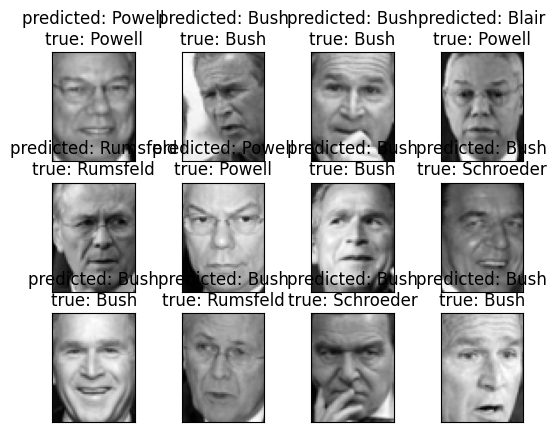

In [11]:
# visualization functions
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)

print("Visualization:")
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

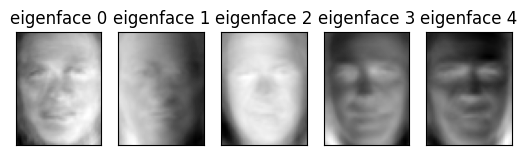

In [14]:
# Q1: Generate top 5 eigenfaces from PCA and visualize.
# Hint: Eigenface means the top principal component of the face dataset.

def generate_top_k_eigenfaces(k):
    # implement your code here
    top_k_eigenfaces = pca.components_[:k]
    return top_k_eigenfaces

eigenfaces = generate_top_k_eigenfaces(5)
eigenface_titles = ["eigenface {0}".format(i) for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, rows=1, cols=5)

100%|██████████| 49/49 [00:41<00:00,  1.18it/s]


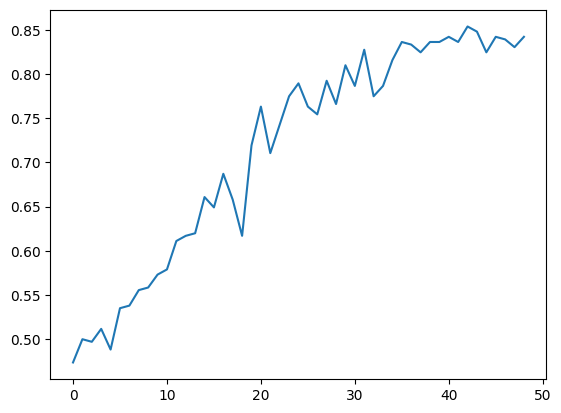

In [8]:
# Q2: Complete the two functions below,
# then plot the validation accuracy against PCA dimension at integer values in [1, 50]
# How does PCA dimension impact validation performance?
def calc_accuracy(y_pred, y_test):
    # implement your code here.
    accuracy = 0
    total_num = y_pred.shape[0]
    accuracy = np.sum(y_pred == y_test) / total_num
    return accuracy

def statistic_accuracy_PCA_dimension(X_train, X_test, y_train, y_test, PCA_dim):
    n_components = PCA_dim
    pca = sklearn_PCA(n_components=n_components, whiten=True).fit(X_train)
    # implement your code here
    # the hints below may help
    # apply PCA transformation to train and test
    train_pca = pca.transform(X_train)
    test_pca = pca.transform(X_test)
    
    # train a neural network (check the second block) on the dimension-reduced data
    clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, 
                        early_stopping=True).fit(train_pca, y_train)
    y_pred = clf.predict(test_pca)
    # test validation accuracy
    
    accuracy = 0
    accuracy = calc_accuracy(y_pred, y_test)
    return accuracy

Accuracy_vec = []

import tqdm
for pca_dim in tqdm.tqdm(range(1, 50)):
    PCA_dim = pca_dim
    Accuracy_vec.append(statistic_accuracy_PCA_dimension(X_train, X_test, y_train, y_test,PCA_dim))

plt.plot(Accuracy_vec)

In [9]:
# Q3: Implement power method to solve spectral decomposition.
# Hint: Read BHK 3.7
def power_method(A, epsilon=1e-10, verbosity=False): 
    
    # Initialize variables
    m = A.shape[0]
    v = np.ones(m) / np.sqrt(m)
    eig = (A @ v / v)[0]
    k = 0

    while True:
        # implement your code here
        # compute matrix-vector product, normalize
        v_new = A @ v
        eig_new = v.T @ v_new
        v_new = v_new / np.linalg.norm(v_new)
        # test stop condition and loop update
        if np.abs(eig - eig_new) < epsilon:
            break
        k += 1
        v = v_new
        eig = eig_new
        if k > 1e3:
            if verbosity:
                print('did not converge')
            break
    if verbosity:
        print(f'iteration count: {k}')
    
    return eig_new, v_new

def spectral_decomposition(A, k=1e6, epsilon = 1e-10):
    k = min(k, A.shape[0])
    remaining_part = A.copy()
    first_k_spectral = []

    for i in tqdm.tqdm(range(k)):
        # implement your code here
        # append (i_th eigenvalue, eigenvector)
        first_k_spectral.append(power_method(remaining_part, epsilon=epsilon, verbosity=True))
        remaining_part -= first_k_spectral[-1][0] * np.outer(first_k_spectral[-1][1], first_k_spectral[-1][1])
    return first_k_spectral    

# test whether your implementation is correct
J = np.array([[1, 2, 3, 4 ], 
             [4, 6, 9, 15], 
             [12, 17, 20, 29]], dtype='float64')

L = spectral_decomposition((J.T) @ J, 3, epsilon=1e-15)
print(L)
a = np.zeros((4, 4), dtype='float64')
for i in range(3):
    a = a + (L[i][0] * np.outer(L[i][1], L[i][1]))
print(a)
print((J.T) @ J)

100%|██████████| 3/3 [00:00<00:00, 201.62it/s]

iteration count: 5
iteration count: 6
iteration count: 2
[(2054.635127760585, array([0.27805752, 0.39850447, 0.48827634, 0.72488924])), (7.1008495450340225, array([ 0.53745754,  0.61728679,  0.04092818, -0.57308054])), (0.2640226943809838, array([ 0.592548  , -0.15412506, -0.71444406,  0.33867688]))]
[[ 161.  230.  279.  412.]
 [ 230.  329.  400.  591.]
 [ 279.  400.  490.  727.]
 [ 412.  591.  727. 1082.]]
[[ 161.  230.  279.  412.]
 [ 230.  329.  400.  591.]
 [ 279.  400.  490.  727.]
 [ 412.  591.  727. 1082.]]


In [10]:
# Q4: Use Spectral decomposition to compute SVD
def svd(A, k=1e6, epsilon=1e-10):
    m, n = A.shape
    k = min(k, m, n)
    singular_values = np.zeros(k)
    U = np.zeros((m, k))
    V = np.zeros((k, n))
    if m >= n:
        # implement your code here
        spectral_decomposition_result = spectral_decomposition(A.T @ A, k, epsilon)
        singular_values = np.sqrt([x[0] for x in spectral_decomposition_result])
        V = np.array([x[1] for x in spectral_decomposition_result])
        U = np.array([A @ V[i, :].T / singular_values[i] for i in range(k)]).T
        return singular_values, U, V
    else:
        singular_values, V, U = svd(A.T, k, epsilon)
        return singular_values, U.T, V.T

# test whether your implementation is correct
J = np.array([[1, 2, 3, 4 ], 
             [4, 6, 9, 15], 
             [12, 17, 20, 29]], dtype='float64')

singular_values, U, V = svd(J,2,epsilon=1e-15)
print(U.shape, V.shape)
print(singular_values, "\n", U, "\n", V)

100%|██████████| 2/2 [00:00<00:00, 398.57it/s]

iteration count: 8
iteration count: 8
(3, 2) (2, 4)
[45.32808321  2.66474193] 
 [[ 0.12000182  0.14917261]
 [ 0.41411596  0.89100695]
 [ 0.90227908 -0.42878217]] 
 [[ 0.27805752  0.39850447  0.48827634  0.72488924]
 [-0.53745754 -0.61728679 -0.04092818  0.57308054]]


Result of sklearn PCA:
                   precision    recall  f1-score   support

     Colin Powell       0.83      0.88      0.85        59
  Donald Rumsfeld       0.92      0.65      0.76        34
    George W Bush       0.88      0.92      0.90       171
Gerhard Schroeder       0.85      0.56      0.68        39
       Tony Blair       0.68      0.87      0.76        39

         accuracy                           0.84       342
        macro avg       0.83      0.78      0.79       342
     weighted avg       0.85      0.84      0.84       342

Result of SVD-based PCA:


  0%|          | 0/50 [00:00<?, ?it/s]

iteration count: 3


  4%|▍         | 2/50 [00:00<00:04, 10.51it/s]

iteration count: 15
iteration count: 56


 10%|█         | 5/50 [00:01<00:09,  4.70it/s]

iteration count: 58
iteration count: 15


 12%|█▏        | 6/50 [00:01<00:10,  4.25it/s]

iteration count: 56


 14%|█▍        | 7/50 [00:01<00:11,  3.64it/s]

iteration count: 61


 16%|█▌        | 8/50 [00:02<00:13,  3.14it/s]

iteration count: 69


 18%|█▊        | 9/50 [00:02<00:15,  2.59it/s]

iteration count: 89


 20%|██        | 10/50 [00:02<00:14,  2.85it/s]

iteration count: 41


 22%|██▏       | 11/50 [00:03<00:16,  2.39it/s]

iteration count: 81


 24%|██▍       | 12/50 [00:03<00:15,  2.49it/s]

iteration count: 39


 26%|██▌       | 13/50 [00:04<00:18,  1.99it/s]

iteration count: 141


 28%|██▊       | 14/50 [00:04<00:15,  2.36it/s]

iteration count: 52


 30%|███       | 15/50 [00:06<00:31,  1.10it/s]

iteration count: 415


 32%|███▏      | 16/50 [00:07<00:32,  1.03it/s]

iteration count: 151


 34%|███▍      | 17/50 [00:09<00:33,  1.03s/it]

iteration count: 201


 36%|███▌      | 18/50 [00:09<00:26,  1.19it/s]

iteration count: 60


 38%|███▊      | 19/50 [00:10<00:23,  1.30it/s]

iteration count: 119


 40%|████      | 20/50 [00:10<00:23,  1.28it/s]

iteration count: 126


 42%|████▏     | 21/50 [00:11<00:19,  1.49it/s]

iteration count: 65


 44%|████▍     | 22/50 [00:12<00:18,  1.51it/s]

iteration count: 126


 46%|████▌     | 23/50 [00:12<00:17,  1.50it/s]

iteration count: 133


 48%|████▊     | 24/50 [00:13<00:17,  1.52it/s]

iteration count: 116


 50%|█████     | 25/50 [00:13<00:15,  1.66it/s]

iteration count: 90


 52%|█████▏    | 26/50 [00:14<00:15,  1.55it/s]

iteration count: 155


 54%|█████▍    | 27/50 [00:15<00:15,  1.51it/s]

iteration count: 124


 56%|█████▌    | 28/50 [00:15<00:13,  1.60it/s]

iteration count: 120


 58%|█████▊    | 29/50 [00:16<00:12,  1.64it/s]

iteration count: 85


 60%|██████    | 30/50 [00:17<00:14,  1.42it/s]

iteration count: 145


 62%|██████▏   | 31/50 [00:17<00:12,  1.52it/s]

iteration count: 95


 64%|██████▍   | 32/50 [00:20<00:21,  1.21s/it]

iteration count: 496


 66%|██████▌   | 33/50 [00:21<00:19,  1.13s/it]

iteration count: 168


 68%|██████▊   | 34/50 [00:22<00:16,  1.03s/it]

iteration count: 112


 70%|███████   | 35/50 [00:22<00:14,  1.00it/s]

iteration count: 141


 72%|███████▏  | 36/50 [00:24<00:14,  1.03s/it]

iteration count: 229


 74%|███████▍  | 37/50 [00:26<00:17,  1.31s/it]

iteration count: 252


 76%|███████▌  | 38/50 [00:26<00:14,  1.18s/it]

iteration count: 122


 78%|███████▊  | 39/50 [00:27<00:11,  1.08s/it]

iteration count: 139


 80%|████████  | 40/50 [00:28<00:08,  1.15it/s]

iteration count: 86


 82%|████████▏ | 41/50 [00:28<00:07,  1.18it/s]

iteration count: 165


 84%|████████▍ | 42/50 [00:29<00:07,  1.14it/s]

iteration count: 184


 86%|████████▌ | 43/50 [00:36<00:17,  2.48s/it]

iteration count: 898


 88%|████████▊ | 44/50 [00:37<00:12,  2.03s/it]

iteration count: 159


 90%|█████████ | 45/50 [00:37<00:08,  1.67s/it]

iteration count: 152


 92%|█████████▏| 46/50 [00:38<00:05,  1.38s/it]

iteration count: 145


 94%|█████████▍| 47/50 [00:39<00:03,  1.18s/it]

iteration count: 127


 96%|█████████▌| 48/50 [00:44<00:04,  2.42s/it]

iteration count: 920


 98%|█████████▊| 49/50 [00:45<00:01,  1.95s/it]

iteration count: 198


100%|██████████| 50/50 [00:46<00:00,  1.08it/s]

iteration count: 160


Iteration 1, loss = 1.58712780
Validation score: 0.500000
Iteration 2, loss = 1.33298142
Validation score: 0.587500
Iteration 3, loss = 1.13719816
Validation score: 0.687500
Iteration 4, loss = 1.02043137
Validation score: 0.625000
Iteration 5, loss = 0.93509911
Validation score: 0.737500
Iteration 6, loss = 0.82921037
Validation score: 0.712500
Iteration 7, loss = 0.76715985
Validation score: 0.750000
Iteration 8, loss = 0.69301794
Validation score: 0.787500
Iteration 9, loss = 0.63947067
Validation score: 0.812500
Iteration 10, loss = 0.59356773
Validation score: 0.812500
Iteration 11, loss = 0.55104539
Validation score: 0.800000
Iteration 12, loss = 0.51575156
Validation score: 0.812500
Iteration 13, loss = 0.48401245
Validation score: 0.800000
Iteration 14, loss = 0.45697251
Validation score: 0.800000
Iteration 15, loss = 0.43336340
Validation score: 0.812500
Iteration 16, loss = 0.41106991
Validation score: 0.800000
Iteration 17, loss = 0.39107695
Validation score: 0.812500
Iterat

  4%|▍         | 2/50 [00:00<00:04, 10.37it/s]

iteration count: 3
iteration count: 15
iteration count: 56


  8%|▊         | 4/50 [00:00<00:11,  4.13it/s]

iteration count: 58
iteration count: 15


 12%|█▏        | 6/50 [00:01<00:09,  4.50it/s]

iteration count: 56


 14%|█▍        | 7/50 [00:01<00:11,  3.67it/s]

iteration count: 61


 16%|█▌        | 8/50 [00:02<00:12,  3.31it/s]

iteration count: 69


 18%|█▊        | 9/50 [00:02<00:14,  2.82it/s]

iteration count: 89


 20%|██        | 10/50 [00:02<00:12,  3.11it/s]

iteration count: 41


 24%|██▍       | 12/50 [00:03<00:11,  3.34it/s]

iteration count: 81
iteration count: 39


 26%|██▌       | 13/50 [00:03<00:13,  2.68it/s]

iteration count: 141
iteration count: 52


 30%|███       | 15/50 [00:06<00:35,  1.02s/it]

iteration count: 415


 32%|███▏      | 16/50 [00:07<00:35,  1.03s/it]

iteration count: 151


 34%|███▍      | 17/50 [00:09<00:35,  1.07s/it]

iteration count: 201


 36%|███▌      | 18/50 [00:09<00:27,  1.17it/s]

iteration count: 60


 38%|███▊      | 19/50 [00:10<00:25,  1.24it/s]

iteration count: 119


 40%|████      | 20/50 [00:10<00:23,  1.27it/s]

iteration count: 126


 42%|████▏     | 21/50 [00:11<00:19,  1.52it/s]

iteration count: 65


 44%|████▍     | 22/50 [00:11<00:19,  1.47it/s]

iteration count: 126


 46%|████▌     | 23/50 [00:12<00:18,  1.48it/s]

iteration count: 133


 48%|████▊     | 24/50 [00:13<00:16,  1.61it/s]

iteration count: 116


 50%|█████     | 25/50 [00:13<00:13,  1.83it/s]

iteration count: 90


 52%|█████▏    | 26/50 [00:14<00:13,  1.78it/s]

iteration count: 155


 54%|█████▍    | 27/50 [00:14<00:14,  1.60it/s]

iteration count: 124


 56%|█████▌    | 28/50 [00:15<00:14,  1.50it/s]

iteration count: 120


 58%|█████▊    | 29/50 [00:16<00:13,  1.52it/s]

iteration count: 85


 60%|██████    | 30/50 [00:17<00:14,  1.40it/s]

iteration count: 145


 62%|██████▏   | 31/50 [00:17<00:12,  1.57it/s]

iteration count: 95


 64%|██████▍   | 32/50 [00:21<00:30,  1.67s/it]

iteration count: 496


 66%|██████▌   | 33/50 [00:22<00:24,  1.42s/it]

iteration count: 168


 68%|██████▊   | 34/50 [00:22<00:18,  1.14s/it]

iteration count: 112


 70%|███████   | 35/50 [00:23<00:15,  1.06s/it]

iteration count: 141


 72%|███████▏  | 36/50 [00:25<00:16,  1.16s/it]

iteration count: 229


 74%|███████▍  | 37/50 [00:26<00:15,  1.17s/it]

iteration count: 252


 76%|███████▌  | 38/50 [00:27<00:13,  1.13s/it]

iteration count: 122


 78%|███████▊  | 39/50 [00:28<00:12,  1.16s/it]

iteration count: 139


 80%|████████  | 40/50 [00:29<00:09,  1.01it/s]

iteration count: 86


 82%|████████▏ | 41/50 [00:30<00:08,  1.00it/s]

iteration count: 165


 84%|████████▍ | 42/50 [00:31<00:09,  1.16s/it]

iteration count: 184


 86%|████████▌ | 43/50 [00:37<00:18,  2.63s/it]

iteration count: 898


 88%|████████▊ | 44/50 [00:38<00:12,  2.06s/it]

iteration count: 159


 90%|█████████ | 45/50 [00:40<00:09,  1.87s/it]

iteration count: 152


 92%|█████████▏| 46/50 [00:41<00:06,  1.72s/it]

iteration count: 145


 94%|█████████▍| 47/50 [00:42<00:04,  1.57s/it]

iteration count: 127


 96%|█████████▌| 48/50 [00:49<00:06,  3.05s/it]

iteration count: 920


 98%|█████████▊| 49/50 [00:50<00:02,  2.52s/it]

iteration count: 198


100%|██████████| 50/50 [00:51<00:00,  1.03s/it]

iteration count: 160


Iteration 1, loss = 1.86229757
Validation score: 0.562500
Iteration 2, loss = 1.42173544
Validation score: 0.637500
Iteration 3, loss = 1.37971903
Validation score: 0.625000
Iteration 4, loss = 1.19371113
Validation score: 0.700000
Iteration 5, loss = 0.97679580
Validation score: 0.787500
Iteration 6, loss = 0.90709675
Validation score: 0.800000
Iteration 7, loss = 0.85905753
Validation score: 0.775000
Iteration 8, loss = 0.74732037
Validation score: 0.787500
Iteration 9, loss = 0.70714807
Validation score: 0.762500
Iteration 10, loss = 0.66272175
Validation score: 0.812500
Iteration 11, loss = 0.60368640
Validation score: 0.837500
Iteration 12, loss = 0.56407778
Validation score: 0.850000
Iteration 13, loss = 0.53909424
Validation score: 0.837500
Iteration 14, loss = 0.50364579
Validation score: 0.875000
Iteration 15, loss = 0.47711366
Validation score: 0.875000
Iteration 16, loss = 0.45505754
Validation score: 0.875000
Iteration 17, loss = 0.43150592
Validation score: 0.875000
Iterat

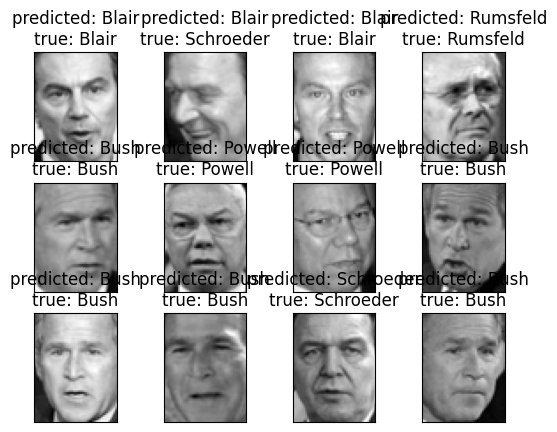

In [11]:
# Q5: Use SVD to implement PCA,
# then test your SVD against sklearn implementation in the beginning on lfw dataset,
# and confirm that your code is correct.

def eigenface_PCA_via_svd(X_train, X_test, y_train, n_components, epsilon = 1e-5):
    # implement your code here
    # run svd
    singular_values, U, V = svd(X_train, n_components, epsilon)

    # train your model using svd
    X_train_pca = X_train @ (V.T)
    X_test_pca = X_test @ (V.T)
    clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, 
                    early_stopping=True).fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    return y_pred
    
print("Result of sklearn PCA:")
print(classification_report(y_test, y_pred, target_names = target_names))

print("Result of SVD-based PCA:")
# implement your code here
print(classification_report(y_test, eigenface_PCA_via_svd(X_train, X_test, y_train, n_components), target_names = target_names))

print("Visualization of SVD-based PCA:")
# implement your code here
prediction_titles = list(titles(eigenface_PCA_via_svd(X_train, X_test, y_train, n_components), y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)
